In [1]:
#importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce-Customers.csv')    

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()
#sem dados nulos no dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
import pandas_profiling as pp

In [8]:
pr = df.profile_report()

In [9]:
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# alguns insights tirados dos dados

- usuarios que passam mais tempo no site não necessariamente gastam mais
- usuarios que gastam mais tempo no app tem uma tendencia para gastar mais
- não há uma correlação entre tempo no app/site e se o usuario é um membro antigo
- há uma correlação linear entre o tempo de membro e a quantidade gasta anualmente

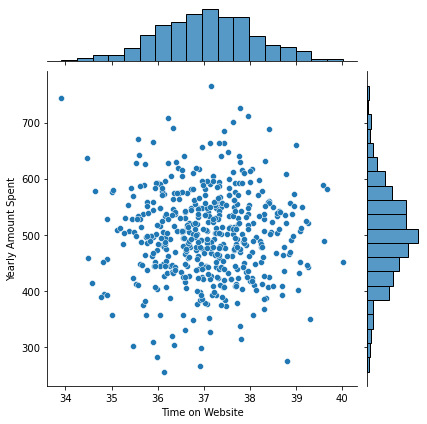

In [10]:
#relação de tempo no site e valor gasto anualmente
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df );

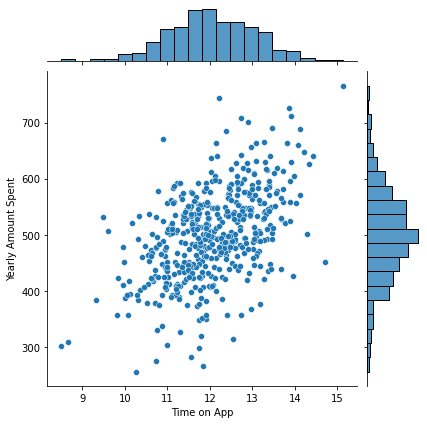

In [11]:
#relação do tempo gasto no app e valor gasto anualmente
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df );

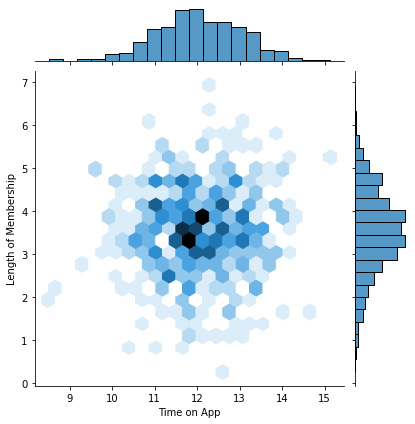

In [12]:
#relação do tempo de membro com tempo gasto no app
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = df, kind = 'hex' );

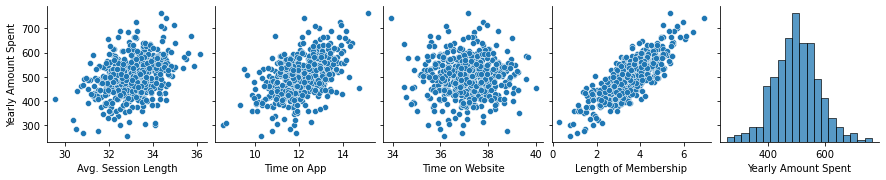

In [20]:
#pode-se observar uma correlação forte entre o valor gasto e o tempo de membro, também há uma correlação fraca entre o tempo no app e o tempo das sessoes de consultoria  
sns.pairplot(df, y_vars = ['Yearly Amount Spent']);

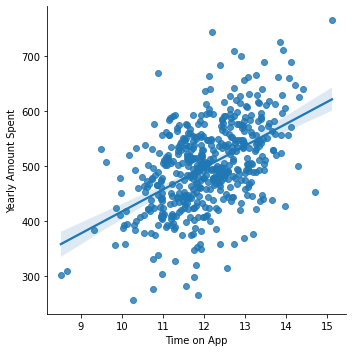

In [21]:
sns.lmplot(x= 'Time on App', y = 'Yearly Amount Spent', data = df);

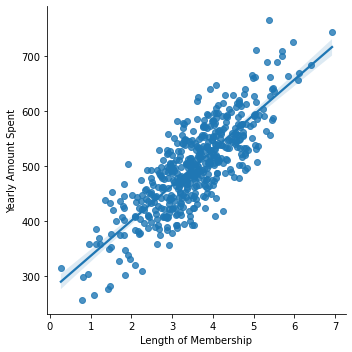

In [22]:
sns.lmplot(x= 'Length of Membership', y = 'Yearly Amount Spent', data = df);

In [23]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


# hora de criar o modelo

In [24]:
#separando os dados
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#dividindo os dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(x_train, y_train)

LinearRegression()

In [30]:
lm.coef_

array([25.82792018, 38.80900145,  0.28174274, 61.30479927])

In [31]:
pred = lm.predict(x_test)

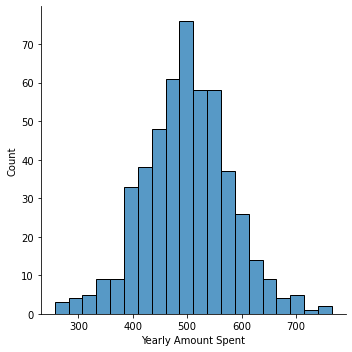

In [33]:
#distribuição da variavel alvo 
sns.displot(df, x = 'Yearly Amount Spent')
plt.tight_layout()

In [34]:
from sklearn import metrics

In [35]:
#avaliando o modelo
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))

MAE: 7.099124594093863
MSE: 80.90062369759956
RMSE: 8.994477399915993
R: 0.9884637234896453


In [36]:
def adjusted_r(y, pred, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, pred)) * (len(y) - 1)) / (len(y) - N - 1)) 
    return adj_r

In [37]:
print('r_adjusted:', adjusted_r(y_test, pred, x_train.shape[1]))

r_adjusted: 0.9881454813790148


In [46]:
#pode-se observar que a variavel mais importante pro modelo é o tempo de membro
coef = pd.DataFrame(lm.coef_, x.columns, columns = ['Coefs'])
coef

,Coefs
Avg. Session Length,25.827920
Time on App,38.809001
Time on Website,0.281743
Length of Membership,61.304799


# conclusões finais

- a cada aumento no tempo médio das sessoes de consultoria, temos um aumento de ≅25.82 dolares gasto no ano
- a cada minuto gasto em media no app, aumenta a receita anual em ≅38.80 dolares
- o tempo no site reflete muito pouco na receita anual
- a empresa ganha mais quando fideliza seu cliente, quanto mais tempoem unidade de fidelização maior a receita anual em ≅61.30 
- portanto é mais interessante para a empresa investir no app do que no site